# part B

In [2]:
#imports
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")


#Load data
bookingHotels1 = pd.read_csv('bookingHotels1.csv')
bookingHotels2 = pd.read_csv('bookingHotels2.csv')
bookingHotels3 = pd.read_csv('bookingHotels3.csv')
bookingHotels = bookingHotels1.append(bookingHotels2)
bookingHotels = bookingHotels.append(bookingHotels3)

In [3]:
#clean the data

#the same name for expidia and booking
bookingHotels.rename(columns={"numOfNights": "LengthOfStay"},inplace=True)

#Drop rows with null in the price
bookingHotels = bookingHotels.dropna(axis=0, subset=['Price'])


#Clean letters
bookingHotels.replace({'Location': [', New York','nan',', Brooklyn',', Jersey City'],'Price': ['₪ ',',','nan','NaN'], 'Review': [' reviews',',','nan',' review'], 'Rate': ['nan'],  'Distance': [' km from center',' m from center'], 'LengthOfStay' : [' nights',' night'],'TypeRoom' :['nan','NaN','']}, 
                      {'Location':      ''     ,       'Price':    ''     ,              'Review':       ''    ,           'Rate': '' ,  'Distance': '',  'LengthOfStay' : '', 'TypeRoom' :''}
                      ,inplace=True,regex=True)



#Transform Typebed to Oridinaly

bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains('Multiple bed types',na=False)] = 5
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains('2 fulls, 1 sofa bed',na=False)] = 5
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains("1 king, 1 sofa bed",na=False)] = 4
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains('1 sofa bed, 1 queen',na=False)] = 3
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains('1 twin, 1 queen',na=False)] = 3
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains("1 full, 1 king",na=False)] = 4
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains('1 twin, 1 full',na=False)] = 3
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains('2 queen',na=False)] = 4
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains("2 full",na=False)] = 2
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains('2 twin',na=False)] = 2
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains("2 bunk beds",na=False)] = 4
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains("king bed",na=False)] = 3
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains("1 bunk",na=False)] = 2
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains("1 full",na=False)] = 1
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains('twin bed',na=False)] = 1
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains("queen",na=False)] = 2
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains("king",na=False)] = 3
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains("Unknown",na=False)] = 3
bookingHotels["TypeBed"][bookingHotels["TypeBed"].str.contains(' ',na=False)] = 3

#Transform TypeRoom to Oridinaly

bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains('Suite',na=False)] = 6
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains('Deluxe',na=False)] = 5
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains('Superior',na=False)] = 5
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains("King",na=False)] = 4
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains("king",na=False)] = 4
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains('Queen',na=False)] = 3
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains('Double',na=False)] = 2
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains('Twin',na=False)] = 2
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains('Studio',na=False)] = 1
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains(' ',na=False)] = 3
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains('Apartment',na=False)] = 3
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains('Cozy',na=False)] = 3
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains("Unknown",na=False)] = 3
bookingHotels["TypeRoom"][bookingHotels["TypeRoom"].str.contains("bunk",na=False)] = 2
bookingHotels['TypeRoom'] = bookingHotels['TypeRoom'].fillna(3)

#clean the rate
bookingHotels.drop(bookingHotels[bookingHotels['Rate'] == 'Unknown'].index, inplace = True)



#Replace null with the frequent in TypeBed
frequent =int(bookingHotels['TypeBed'].mode())
bookingHotels['TypeBed'] = bookingHotels['TypeBed'].fillna(frequent)

#Transform Grade to Oridinaly
bookingHotels.replace({'Grade' : {'Review score' : 6,'Good' : 7, 'Very Good' : 8, 'Excellent' : 9 ,'Wonderful' : 9, 'Exceptional': 10}},inplace=True)


#Split the Dates
bookingHotels['Start_Date']=bookingHotels['DateOfVacation'].str.slice(stop=10)
bookingHotels['End_Date']=bookingHotels['DateOfVacation'].str.slice(start=11)
bookingHotels.drop(["DateOfVacation"], axis = 1, inplace=True)

bookingHotels = bookingHotels.reset_index()

In [4]:
#convert the data


bookingHotels = bookingHotels.astype({"TypeRoom":"int","Rate":"float","Price":"int","Review":"int","Distance":"float","TypeBed":"int","Grade":"int", 'LengthOfStay' : 'int' })

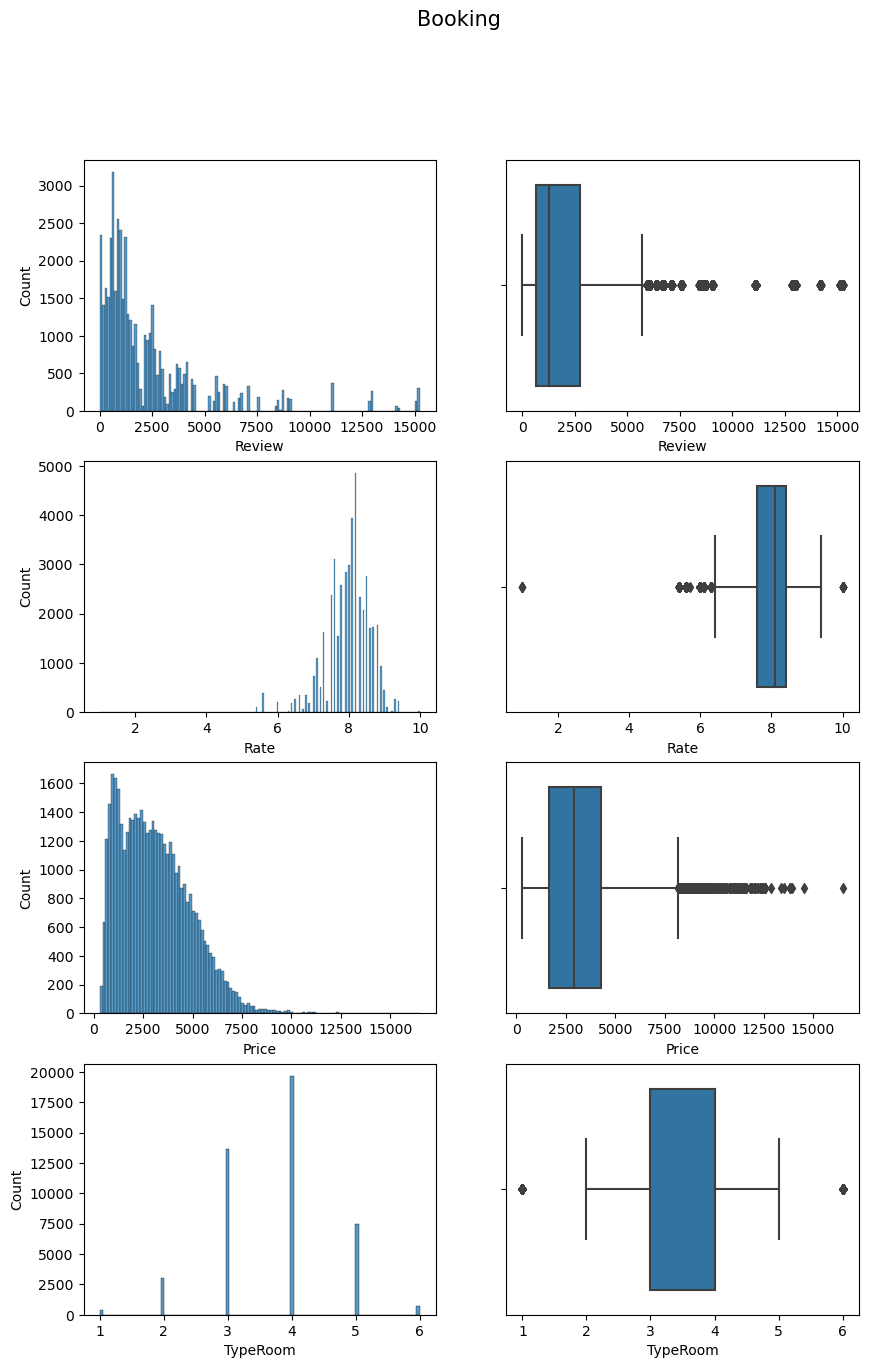

In [5]:
#Distribution graph

#Booking 
fig, axes = plt.subplots(4,2,figsize=(10, 15))

fig.suptitle("Booking", fontsize=15)

sns.histplot(x=bookingHotels['Review'], ax=axes[0,0])
sns.boxplot( x=bookingHotels["Review"],ax=axes[0,1])
sns.histplot(x=bookingHotels['Rate'], ax=axes[1,0])
sns.boxplot( x=bookingHotels["Rate"],ax=axes[1,1])
sns.histplot(x=bookingHotels['Price'], ax=axes[2,0])
sns.boxplot( x=bookingHotels["Price"],ax=axes[2,1])
sns.histplot( x=bookingHotels["TypeRoom"],ax=axes[3,0])
sns.boxplot( x=bookingHotels["TypeRoom"],ax=axes[3,1])

plt.show()

In [6]:
# remove outliers


#Booking
arr = ['Price','Distance']

for col in arr:
    Q1 = np.percentile(bookingHotels[col] , 25)
    Q3 = np.percentile(bookingHotels[col] , 75)

    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    bookingHotels[col] = bookingHotels[col][(bookingHotels[col] < ul) &
                                                (bookingHotels[col] > ll)]
    
    #dropna
    bookingHotels = bookingHotels[bookingHotels['Price'].notna()]
    bookingHotels['Distance'] = bookingHotels['Distance'].fillna(bookingHotels['Distance'].mean())

In [7]:
#order the policy

bookingHotels.rename(columns = {'CancellationPolicy': 'Cancellation'}, inplace = True)
bookingHotels['Prepayment'] = bookingHotels.loc[:, 'Cancellation']


bookingHotels.replace({'Cancellation': ' • No prepayment needed'}, 
                      {'Cancellation':      '' }
                      ,inplace=True,regex=True)

bookingHotels.replace({'Cancellation': 'FREE '}, 
                      {'Cancellation':  'Free ' }
                      ,inplace=True,regex=True)

bookingHotels.replace({'Prepayment': ['FREE cancellation • ','Free cancellation','FREE cancellation','nan']}, 
                      {'Prepayment':      '' }
                      ,inplace=True,regex=True)

bookingHotels.replace({'Prepayment': ' • No prepayment needed' ''}, 
                      {'Prepayment':  'No prepayment needed' }
                      ,inplace=True,regex=True)

In [8]:
#OneHotEncoder

bookingHotels['Location'] = 'L_' + bookingHotels['Location'].astype(str)
bookingHotels

bookingHotels = pd.concat([bookingHotels,pd.get_dummies(bookingHotels.Cancellation),pd.get_dummies(bookingHotels.Prepayment), pd.get_dummies(bookingHotels.Location)], axis=1)
bookingHotels.drop(['Cancellation','Location','Prepayment','',''],axis=1,inplace=True)

  
bookingHotels.rename(columns = {'No prepayment needed': 'Prepayment'}, inplace = True)
bookingHotels.rename(columns = {'Free cancellation': 'Cancellation'}, inplace = True)

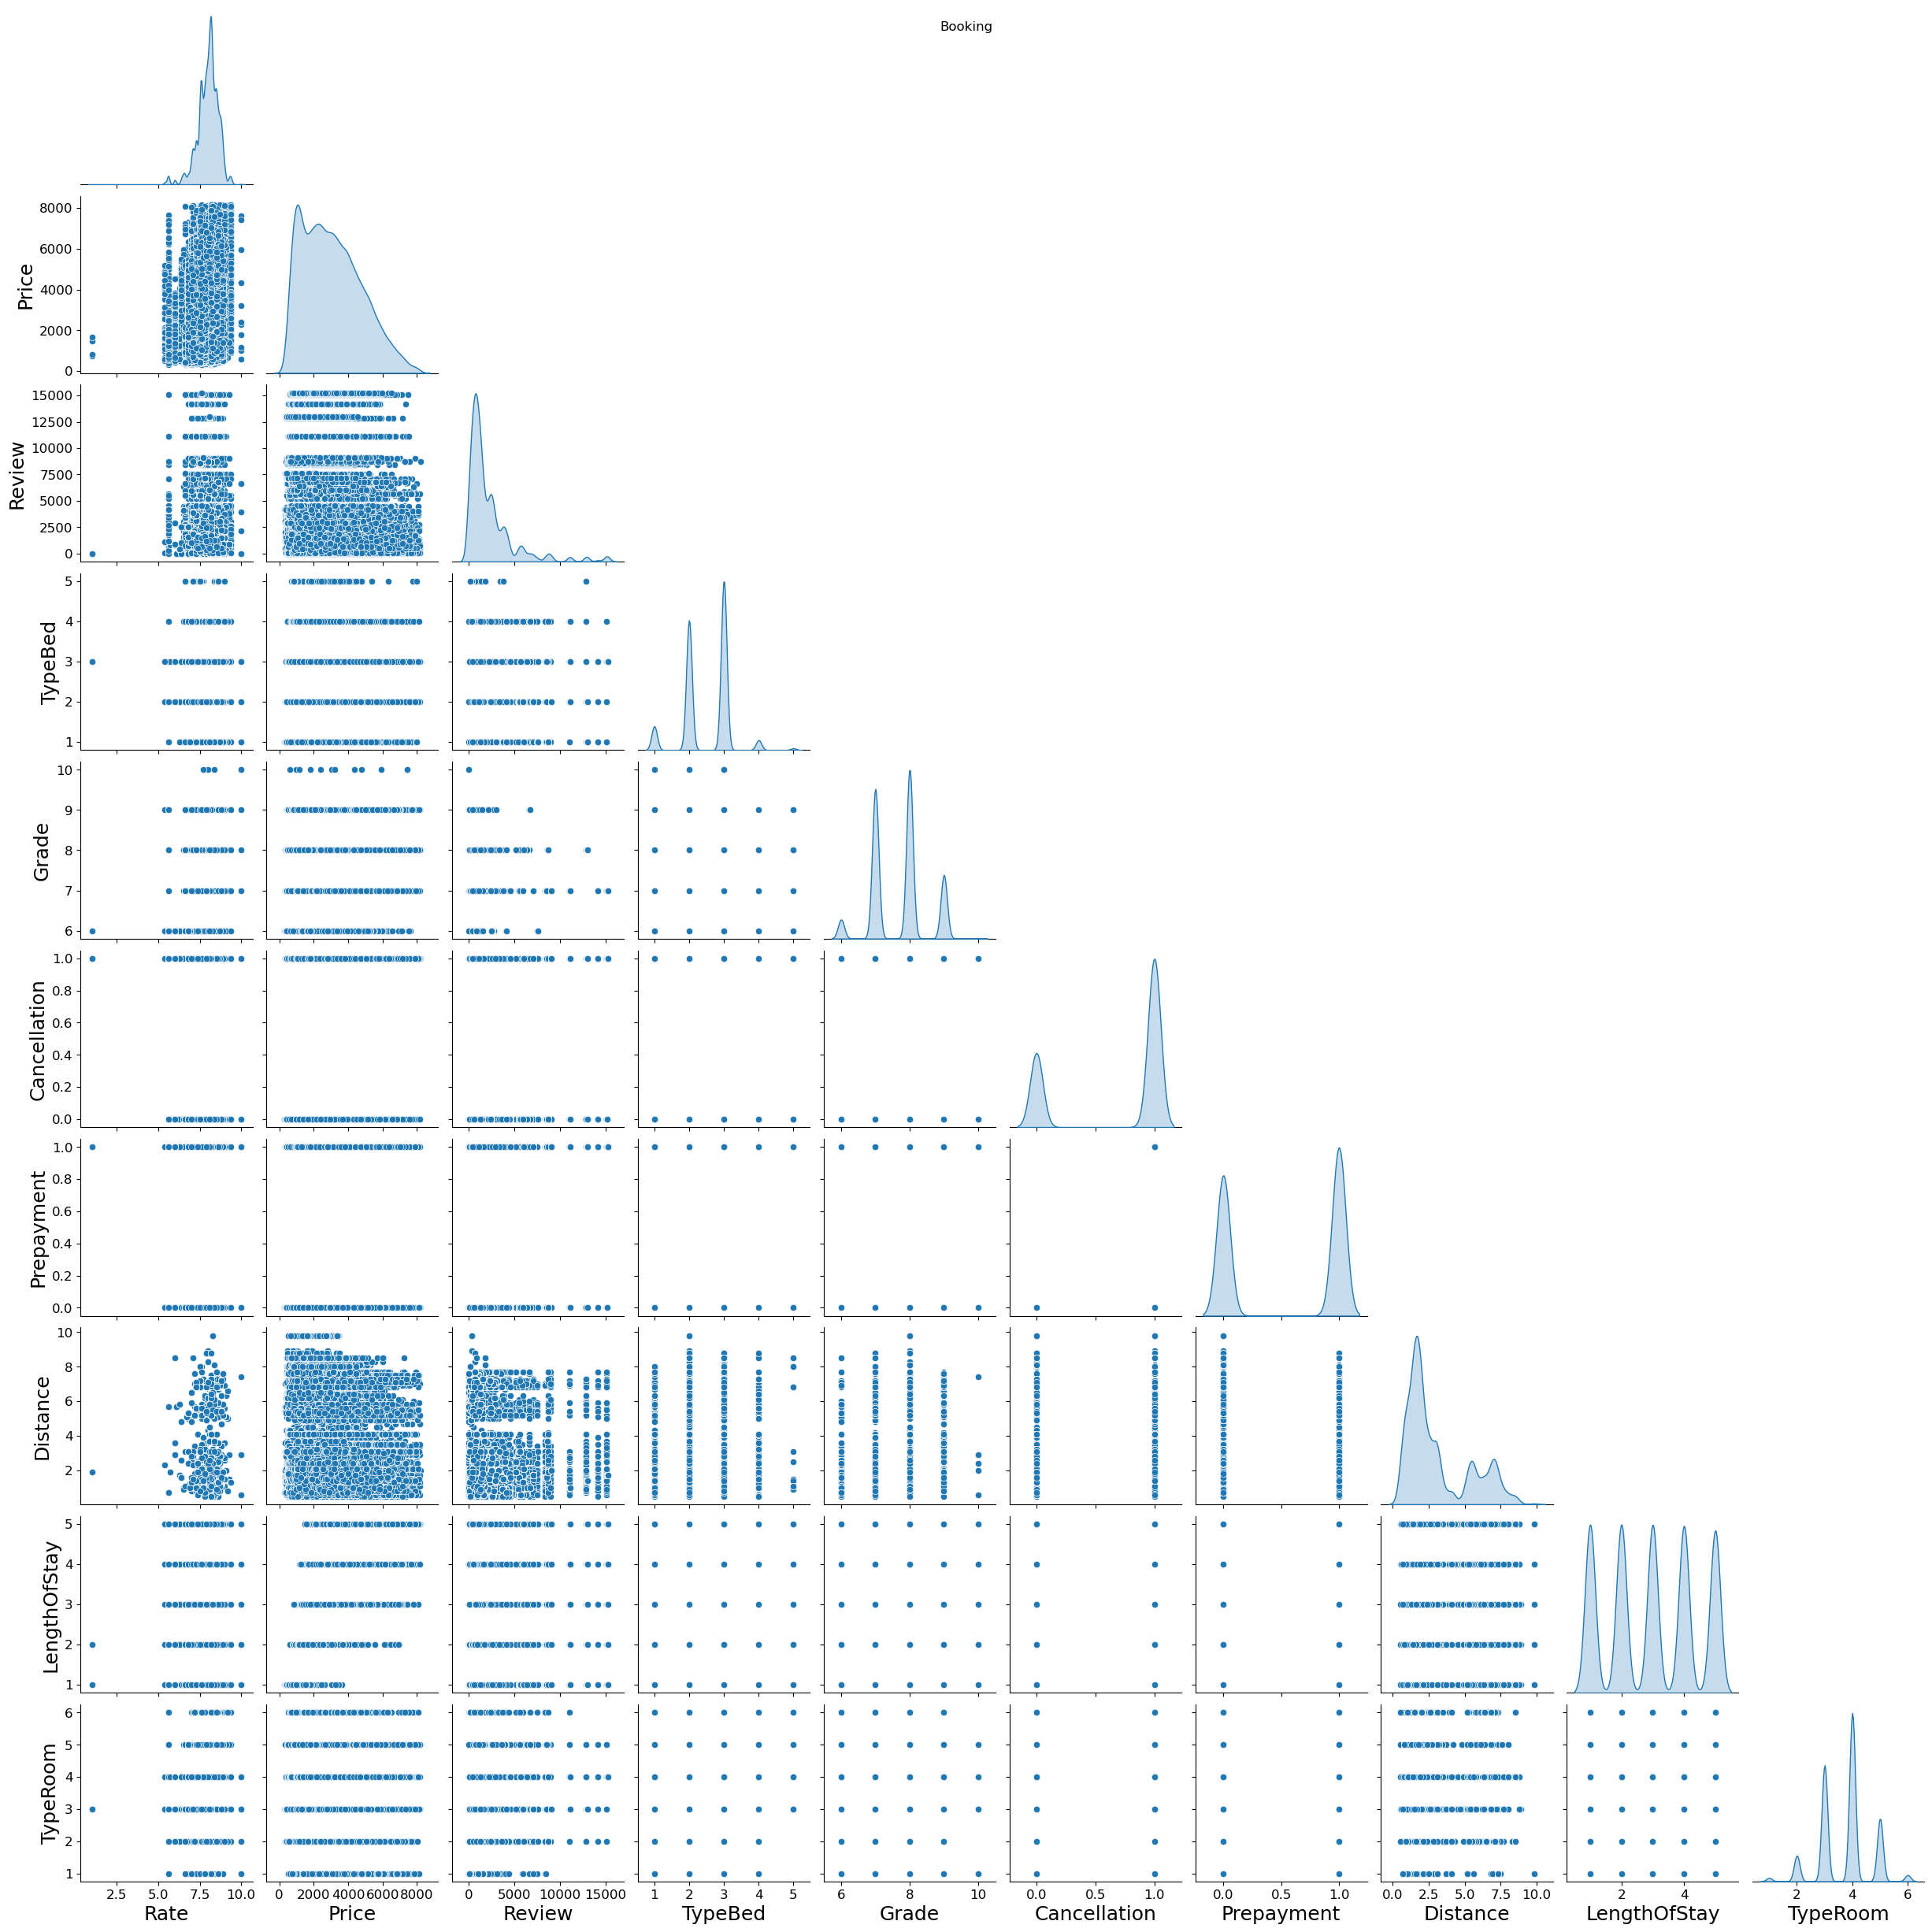

In [9]:
#pairgrid relationship

with sns.plotting_context(rc={"axes.labelsize":18, 'font.size': 12}):
   g = sns.pairplot(bookingHotels[['Rate','Price','Review','TypeBed','Grade','Cancellation','Prepayment','Distance','LengthOfStay',"TypeRoom"]], kind='scatter', diag_kind='kde',corner=True)
g.fig.suptitle("Booking")
plt.show()

**insights**:<br />
1.We can see that a hotel with a small amount of reviews tends to be more extreme in the rate.<br />
2.we see the big corrlelation between rate and grade, they behave in the same way.<br />
3.there is a big correlation between number of nights and the price.<br />
4.type room and type bed have similar correlation to the target.<br />
5.We can see that the hotels with the expensive price tend to be close to the center.<br />
6.Hotels far from the center have fewer reviews, one can assume that fewer people go there.


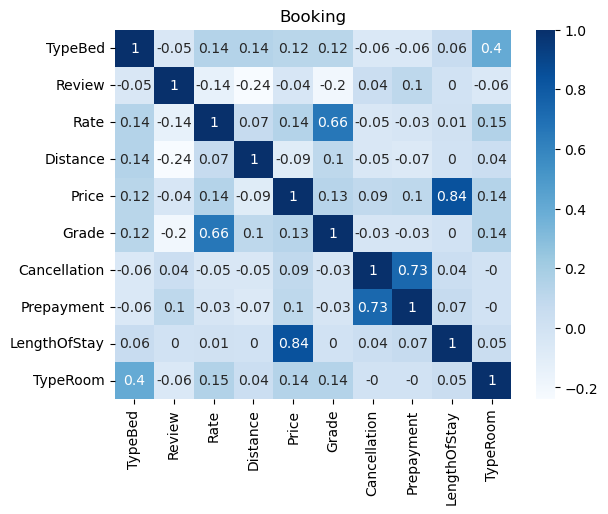

In [14]:
#Correlation

cor_data = bookingHotels[['TypeBed','Review','Rate','Distance','Price','Grade','Cancellation','Prepayment','LengthOfStay','TypeRoom']]
matrix = cor_data.corr().round(2)
sns.heatmap(matrix, cmap='Blues',annot=True)
plt.title('Booking')
plt.show()


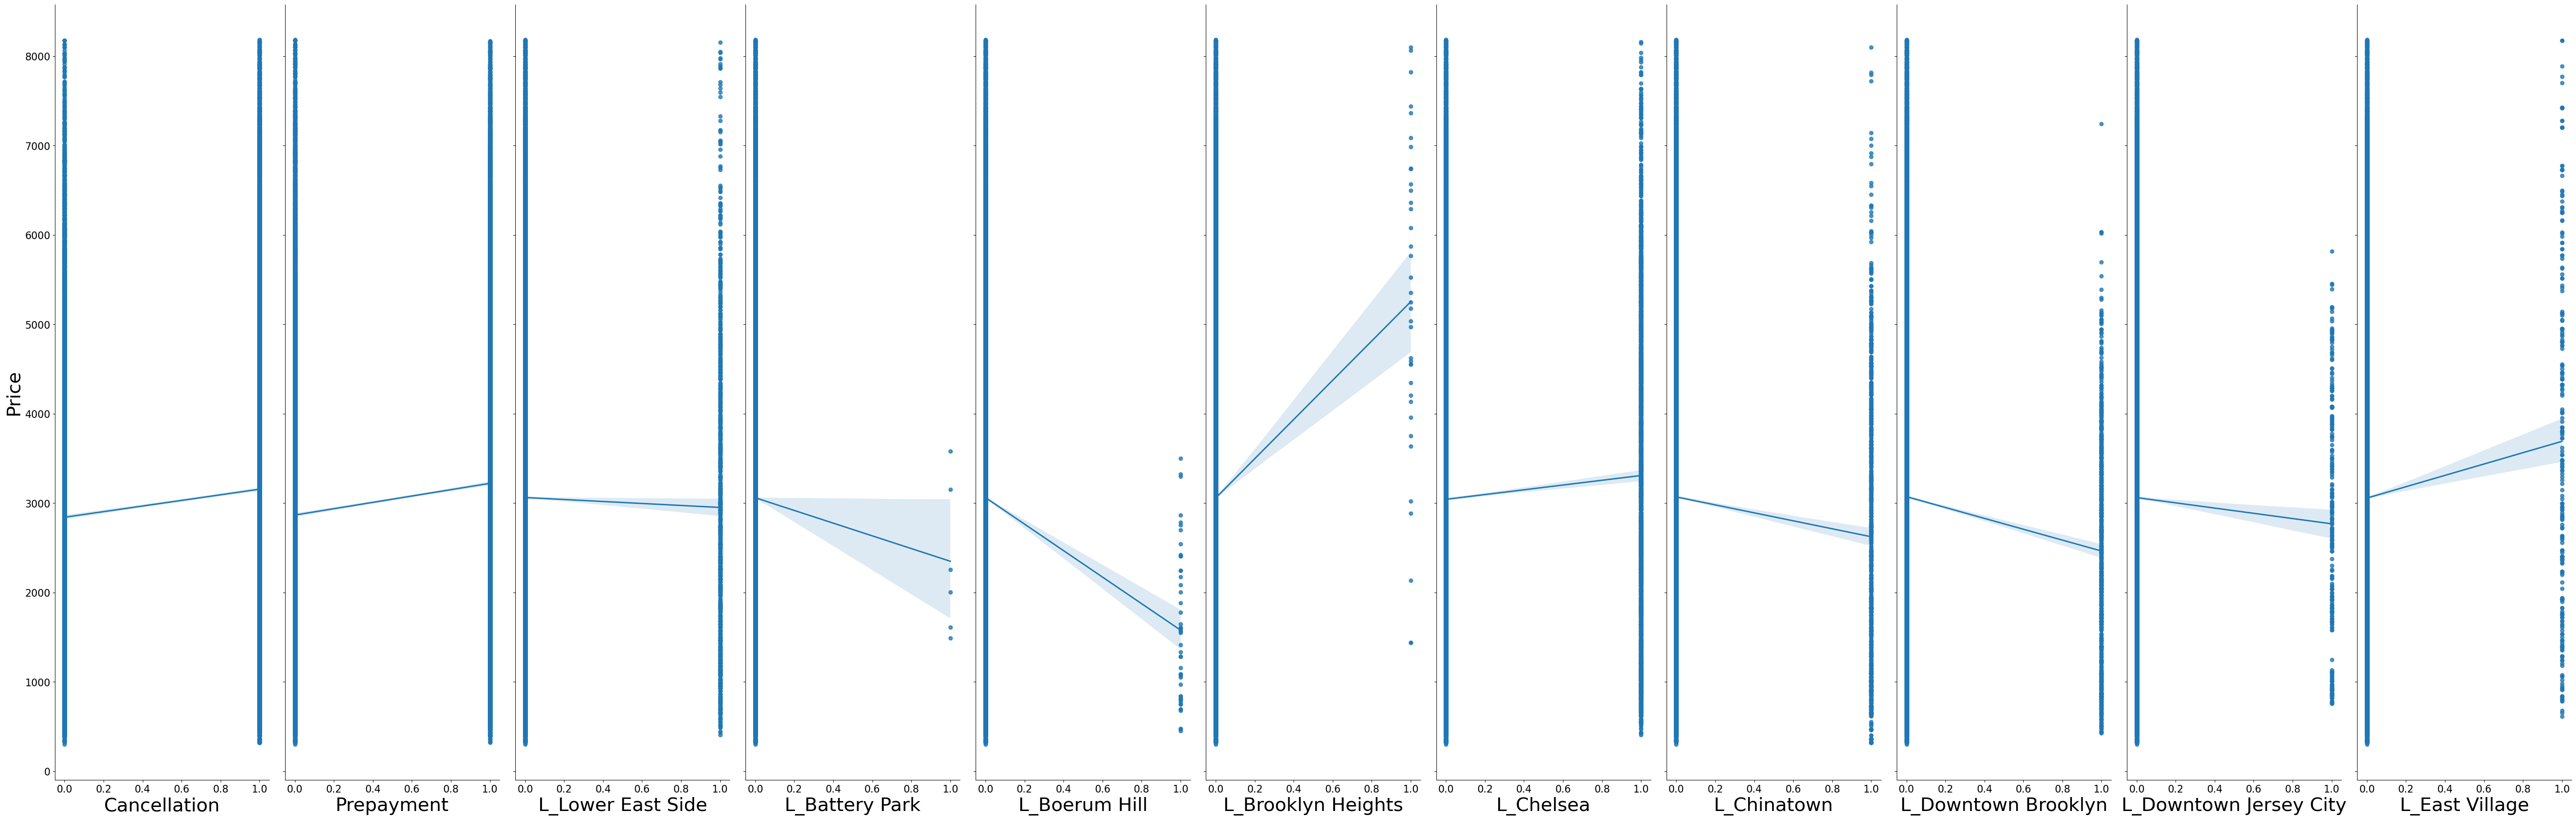

In [11]:
#location and policy

with sns.plotting_context(rc={"axes.labelsize":30,'font.size': 16}):
    g = sns.pairplot(bookingHotels,  
    x_vars=       ['Cancellation', 'Prepayment','L_Lower East Side',
       'L_Battery Park', 'L_Boerum Hill',
       'L_Brooklyn Heights', 'L_Chelsea',
       'L_Chinatown', 'L_Downtown Brooklyn',
       'L_Downtown Jersey City', 'L_East Village'] ,
    y_vars=['Price'],kind='reg')
g.fig.set_size_inches(60,30)
plt.show()          

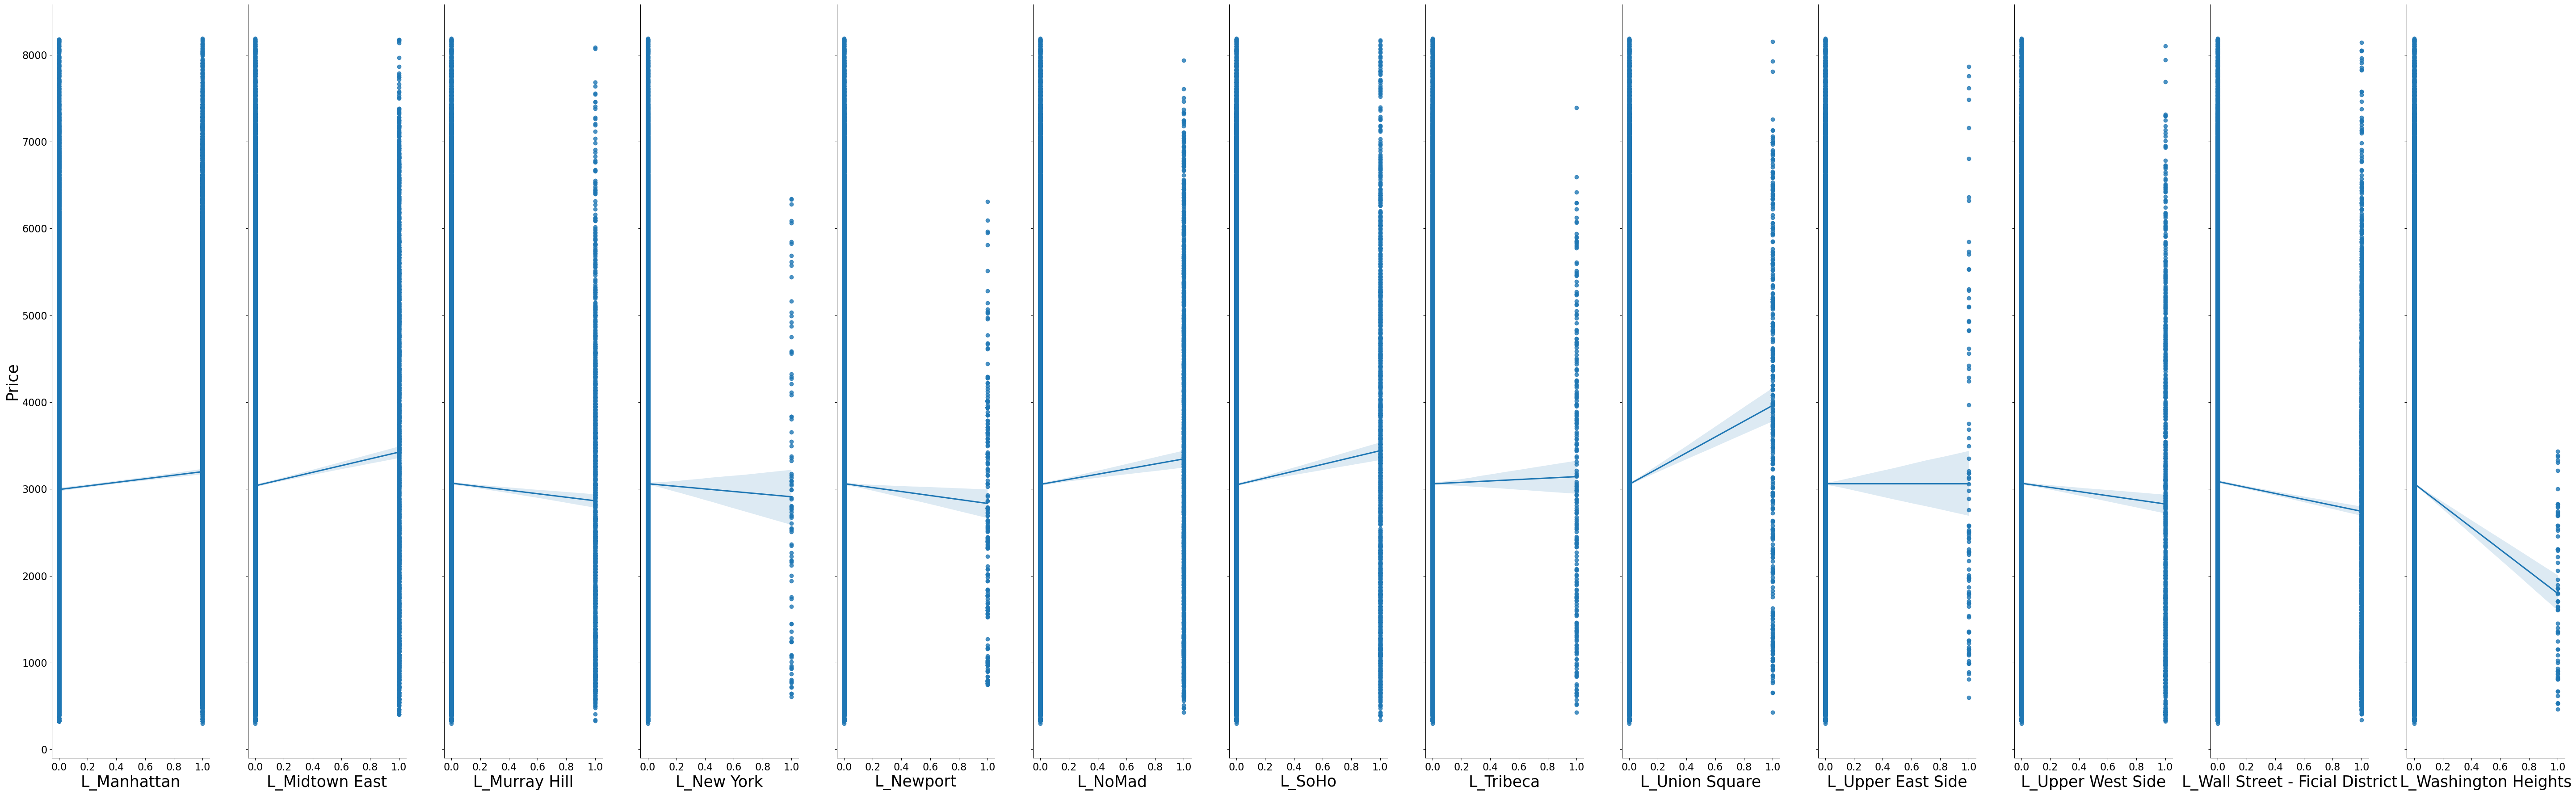

In [12]:
with sns.plotting_context(rc={"axes.labelsize":25,'font.size': 16}):
    g = sns.pairplot(bookingHotels,  
    x_vars=       [ 'L_Manhattan',
       'L_Midtown East', 'L_Murray Hill', 'L_New York',
       'L_Newport', 'L_NoMad', 'L_SoHo',
       'L_Tribeca', 'L_Union Square', 'L_Upper East Side',
       'L_Upper West Side', 'L_Wall Street - Ficial District',
       'L_Washington Heights'] ,
    y_vars=['Price'],kind='reg')
g.fig.set_size_inches(60,30)
plt.show()     
    
    
    


KeyboardInterrupt: 

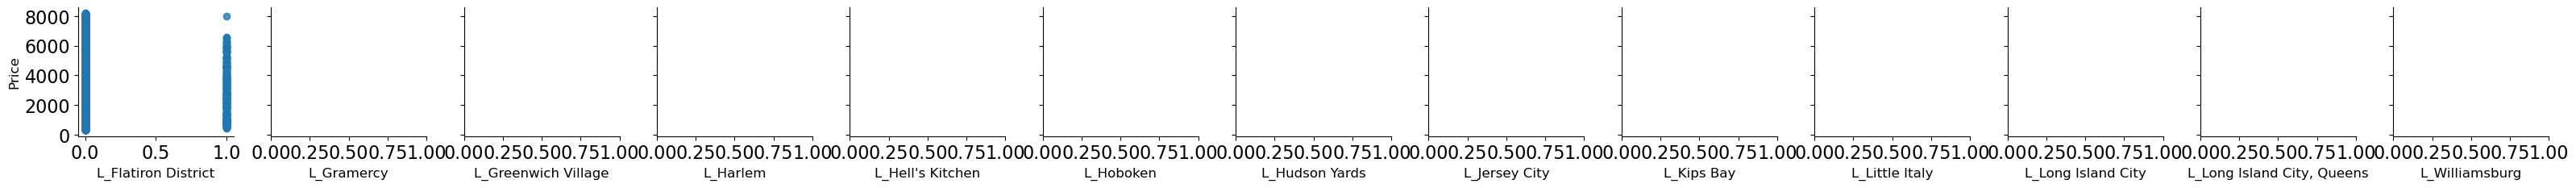

In [13]:
with sns.plotting_context(rc={"axes.labelsize":12,'font.size': 16}):
    g = sns.pairplot(bookingHotels,  
    x_vars=       ['L_Flatiron District', 'L_Gramercy',
       'L_Greenwich Village', 'L_Harlem',
       "L_Hell's Kitchen", 'L_Hoboken', 'L_Hudson Yards',
       'L_Jersey City', 'L_Kips Bay', 'L_Little Italy',
       'L_Long Island City', 'L_Long Island City, Queens', 'L_Williamsburg'] ,
    y_vars=['Price'],kind='reg')
g.fig.set_size_inches(25,18)
plt.show()       
    
    
    
    
    
    
    
    

In [ ]:
#Correlation from Location ana Policy

cor_data = bookingHotels[['Price','L_Brooklyn Heights','L_Boerum Hill','L_Gramercy','L_Hudson Yards','L_Washington Heights','L_Union Square']]
matrix = cor_data.corr().round(2)
sns.heatmap(matrix, cmap='Reds',annot=True)
plt.title('Booking')
plt.show()

In [14]:
#create the csv file
bookingHotels.to_csv('bookingHotelsClean.csv', index=False)